In [1]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from func import*

The Fisher information with two parameter esitmation can be expressed as:

   $ F(\xi, \eta) = \sum_\mu\frac{1}{P(\mu|\xi,\eta)}(\frac{\partial P(\mu|\xi, \eta)}{\partial \xi}*\frac{\partial P(\mu|\xi, \eta)}{\partial \eta})$
Reference: https://doi.org/10.1038/s41467-019-10576-4

### Vacuum state

In [2]:
state_vac = tensor(fock(2, 0), fock(N, 0))
F = FI_calcluation(state_vac, vec)

/Users/panxiaozhou/Documents/GitHub/Metrology_project/protocol_simulation/func.py:56: RuntimeWarning: invalid value encountered in true_divide
  f_11 = (M_slope(p0, xvec, axis=0) * M_slope(p0, xvec, axis=0)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, xvec, axis=0)) / p1
/Users/panxiaozhou/Documents/GitHub/Metrology_project/protocol_simulation/func.py:57: RuntimeWarning: invalid value encountered in true_divide
  f_12 = (M_slope(p0, xvec, axis=0) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, yvec, axis=1)) / p1
/Users/panxiaozhou/Documents/GitHub/Metrology_project/protocol_simulation/func.py:58: RuntimeWarning: invalid value encountered in true_divide
  f_22 = (M_slope(p0, yvec, axis=1) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, yvec, axis=1) * M_slope(p1, yvec, axis=1)) / p1


### Coherent state

In [4]:
cohstate = tensor(fock(2, 0), coherent(N, 1))
F_cohstate = FI_calcluation(cohstate, vec)

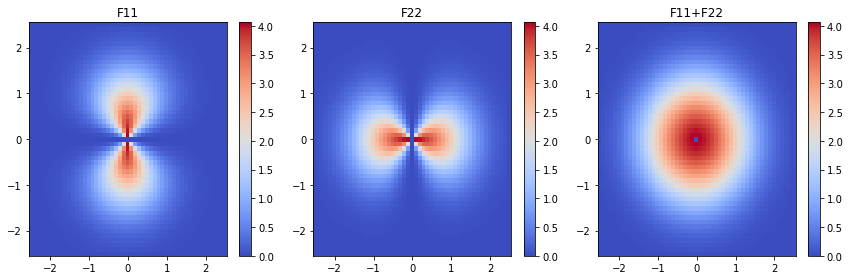

In [5]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
fig_f11 = ax[0].pcolormesh(vec, vec, F_cohstate[0], cmap='coolwarm', shading='auto')
ax[0].set_title('F11')
# ax[0].set_aspect('equal')
fig.colorbar(fig_f11, ax=ax[0])

fig_f22 = ax[1].pcolormesh(vec, vec, F_cohstate[3], cmap='coolwarm', shading='auto')
ax[1].set_title('F22')
# ax[1].set_aspect('equal')
fig.colorbar(fig_f22, ax=ax[1])

fig_f11_f22 = ax[2].pcolormesh(vec, vec, F_cohstate[4], cmap='coolwarm', shading='auto')
ax[2].set_title('F11+F22')
# ax[2].set_aspect('equal')
fig.colorbar(fig_f11_f22, ax=ax[2])

fig.tight_layout()



### Cat state

In [6]:
state_cat = tensor(fock(2, 0), (coherent(N, 1) + coherent(N, -1)).unit() )
F_cat = FI_calcluation(state_cat, vec)

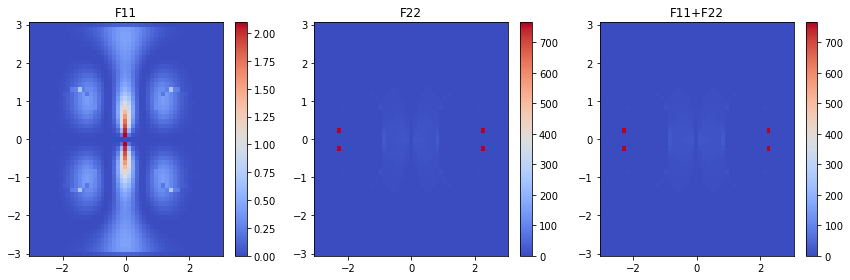

In [9]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
fig_f11 = ax[0].pcolormesh(vec, vec, F_cat[0], cmap='coolwarm', shading='auto')
ax[0].set_title('F11')
# ax[0].set_aspect('equal')
fig.colorbar(fig_f11, ax=ax[0])

fig_f22 = ax[1].pcolormesh(vec, vec, F_cat[3], cmap='coolwarm', shading='auto')
ax[1].set_title('F22')
# ax[1].set_aspect('equal')
fig.colorbar(fig_f22, ax=ax[1])

fig_f11_f22 = ax[2].pcolormesh(vec, vec, F_cat[4], cmap='coolwarm', shading='auto')
ax[2].set_title('F11+F22')
# ax[2].set_aspect('equal')
fig.colorbar(fig_f11_f22, ax=ax[2])

fig.tight_layout()


### Squeezed cat

In [7]:
def SQ(r, theta): # squeezeing operator
    z = r * np.exp(1j * theta)
    return (0.5 * (np.conjugate(z) * a**2 - z * a.dag()**2)).expm()

state_cat = tensor(fock(2, 0), (coherent(N, 2) + coherent(N, -2)).unit() )
state_sqcat = SQ(0.5, 0) * state_cat

In [8]:
F_sqcat = FI_calcluation(state_sqcat, vec)

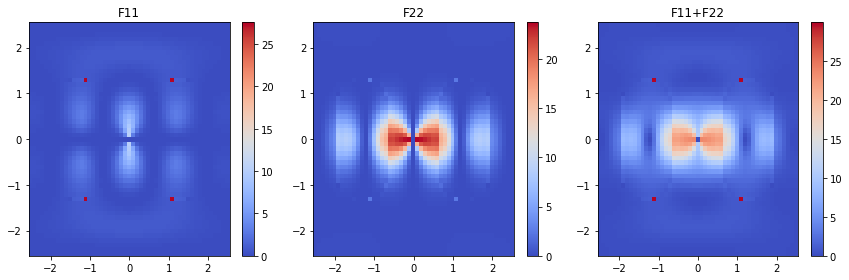

In [10]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
fig_f11 = ax[0].pcolormesh(vec, vec, F_sqcat[0], cmap='coolwarm', shading='auto')
ax[0].set_title('F11')
# ax[0].set_aspect('equal')
fig.colorbar(fig_f11, ax=ax[0])

fig_f22 = ax[1].pcolormesh(vec, vec, F_sqcat[3], cmap='coolwarm', shading='auto')
ax[1].set_title('F22')
# ax[1].set_aspect('equal')
fig.colorbar(fig_f22, ax=ax[1])

fig_f11_f22 = ax[2].pcolormesh(vec, vec, F_sqcat[4], cmap='coolwarm', shading='auto')
ax[2].set_title('F11+F22')
# ax[2].set_aspect('equal')
fig.colorbar(fig_f11_f22, ax=ax[2])

fig.tight_layout()

In [13]:
print(F_sqcat[0].max())
print(F_sqcat[3].max())

27.568681554381296
23.735105468312494


In [14]:
print(F_cat[0].max())
print(F_cat[3].max())

2.120209749968693
84.99185798047404


### Fock state

In [16]:
state_fock  = tensor(fock(2, 0), fock(N, 2) )
F_fock = FI_calcluation(state_fock, vec)

/Users/panxiaozhou/Documents/GitHub/Metrology_project/protocol_simulation/func.py:56: RuntimeWarning: divide by zero encountered in true_divide
  f_11 = (M_slope(p0, xvec, axis=0) * M_slope(p0, xvec, axis=0)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, xvec, axis=0)) / p1
/Users/panxiaozhou/Documents/GitHub/Metrology_project/protocol_simulation/func.py:57: RuntimeWarning: divide by zero encountered in true_divide
  f_12 = (M_slope(p0, xvec, axis=0) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, yvec, axis=1)) / p1
/Users/panxiaozhou/Documents/GitHub/Metrology_project/protocol_simulation/func.py:58: RuntimeWarning: divide by zero encountered in true_divide
  f_22 = (M_slope(p0, yvec, axis=1) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, yvec, axis=1) * M_slope(p1, yvec, axis=1)) / p1


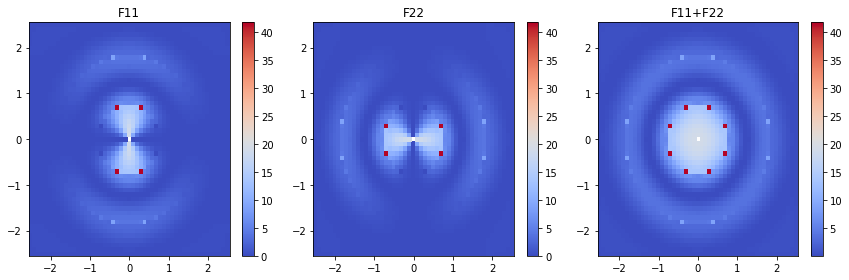

In [17]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
fig_f11 = ax[0].pcolormesh(vec, vec, F_fock[0], cmap='coolwarm', shading='auto')
ax[0].set_title('F11')
# ax[0].set_aspect('equal')
fig.colorbar(fig_f11, ax=ax[0])

fig_f22 = ax[1].pcolormesh(vec, vec, F_fock[3], cmap='coolwarm', shading='auto')
ax[1].set_title('F22')
# ax[1].set_aspect('equal')
fig.colorbar(fig_f22, ax=ax[1])

fig_f11_f22 = ax[2].pcolormesh(vec, vec, F_fock[4], cmap='coolwarm', shading='auto')
ax[2].set_title('F11+F22')
# ax[2].set_aspect('equal')
fig.colorbar(fig_f11_f22, ax=ax[2])

fig.tight_layout()

In [10]:
state_vac = tensor(fock(2, 0), fock(N, 0))
xvec = vec
yvec = vec
p0 = np.zeros((len(xvec), len(xvec)))
p1 = np.zeros((len(xvec), len(xvec)))
for m, vx in enumerate(vec):
    for n, vy in enumerate(vec):
        state_d = D(vx + 1j*vy) * state_vac
        p0[m, n] = abs(state_d.overlap(state_vac))**2
        p1[m, n] = 1 - p0[m, n]


Calculation of $\frac{\partial P(\mu|\xi, \eta)}{\partial \xi}$ and $\frac{\partial P(\mu|\xi, \eta)}{\partial \eta}$

In [11]:
def M_slope(data, vec, axis):
    "for the first and lase points:  p_(i+1)-p(i) ) / (alpha_(i+1)-alpha_(i))" 
    "the rest of points: p_(i+1)-p(i-1) ) / (alpha_(i+1)-alpha_(i-1))"
    step  = (vec.max() - vec.min()) / len(vec)
    if axis == 1:
        data_diff = data[:, 2:] - data[:, :-2]
        first_column = data[:,1] - data[:,0]
        last_column = data[:, -1] - data[:, -2]
        ## add first and last columns
        data_diff_add1 = np.insert(data_diff, 0, first_column, axis=1)
        data_diff_add2 = np.insert(data_diff_add1, data_diff_add1.shape[1], last_column, axis=1)
        slope = data_diff_add2 / (2 * step)
    else:
        data_diff = data[2:,:] - data[:-2, :]
        first_row = data[1, :] - data[0, :]
        last_row = data[-1, :] - data[-2, :]
        ## add first and last rows
        data_diff_add1 = np.insert(data_diff, 0, first_row, axis=0)
        data_diff_add2 = np.insert(data_diff_add1, data_diff_add1.shape[0], last_row, axis=0)
        slope = data_diff_add2 / (2 * step)
    return slope


In [12]:
xvec = vec
yvec = vec
f_11 = (M_slope(p0, xvec, axis=0) * M_slope(p0, xvec, axis=0)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, xvec, axis=0)) / p1
f_12 = (M_slope(p0, xvec, axis=0) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, yvec, axis=1)) / p1
f_22 = (M_slope(p0, yvec, axis=1) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, yvec, axis=1) * M_slope(p1, yvec, axis=1)) / p1

<ipython-input-12-b79dc90a1bac>:3: RuntimeWarning: invalid value encountered in true_divide
  f_11 = (M_slope(p0, xvec, axis=0) * M_slope(p0, xvec, axis=0)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, xvec, axis=0)) / p1
<ipython-input-12-b79dc90a1bac>:4: RuntimeWarning: invalid value encountered in true_divide
  f_12 = (M_slope(p0, xvec, axis=0) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, yvec, axis=1)) / p1
<ipython-input-12-b79dc90a1bac>:5: RuntimeWarning: invalid value encountered in true_divide
  f_22 = (M_slope(p0, yvec, axis=1) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, yvec, axis=1) * M_slope(p1, yvec, axis=1)) / p1


<ipython-input-13-217ca35be522>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xvec, yvec, f_11, cmap='bwr')


Text(0.5, 1.0, 'f_11')

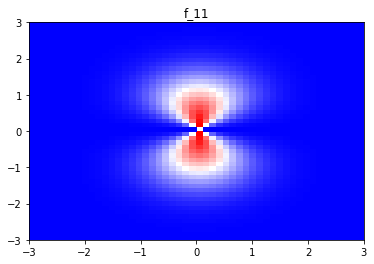

In [13]:
fig = plt.figure()
plt.pcolormesh(xvec, yvec, f_11, cmap='bwr')
plt.title('f_11')

# f_11[:, 25]
# fig = plt.figure()
# plt.plot(f_11[:, 101])
# plt.plot(f_11[:, 100])



<ipython-input-14-dfb1bf052417>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xvec, yvec, f_12, cmap='bwr' )


Text(0.5, 1.0, 'f_12')

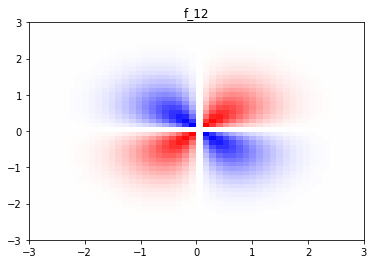

In [14]:
plt.pcolormesh(xvec, yvec, f_12, cmap='bwr' )
plt.title('f_12')

### Cat state

In [10]:
state_cat = tensor(fock(2, 0), (coherent(N, 2) + coherent(N, -2)).unit() )
p0 = np.zeros((len(xvec), len(yvec)))
p1 = np.zeros((len(xvec), len(yvec)))
for m, vx in enumerate(xvec):
    for n, vy in enumerate(yvec):
        state_d = D(vx + 1j*vy) * state_cat
        p0[m, n] = abs(state_d.overlap(state_cat))**2
        p1[m, n] = 1 - p0[m, n]

In [11]:
f_11 = (M_slope(p0, xvec, axis=0) * M_slope(p0, xvec, axis=0)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, xvec, axis=0)) / p1
f_12 = (M_slope(p0, xvec, axis=0) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, yvec, axis=1)) / p1
f_22 = (M_slope(p0, yvec, axis=1) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, yvec, axis=1) * M_slope(p1, yvec, axis=1)) / p1


<ipython-input-11-ee9bbe112751>:1: RuntimeWarning: invalid value encountered in true_divide
  f_11 = (M_slope(p0, xvec, axis=0) * M_slope(p0, xvec, axis=0)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, xvec, axis=0)) / p1
<ipython-input-11-ee9bbe112751>:2: RuntimeWarning: invalid value encountered in true_divide
  f_12 = (M_slope(p0, xvec, axis=0) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, yvec, axis=1)) / p1
<ipython-input-11-ee9bbe112751>:3: RuntimeWarning: invalid value encountered in true_divide
  f_22 = (M_slope(p0, yvec, axis=1) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, yvec, axis=1) * M_slope(p1, yvec, axis=1)) / p1


nan

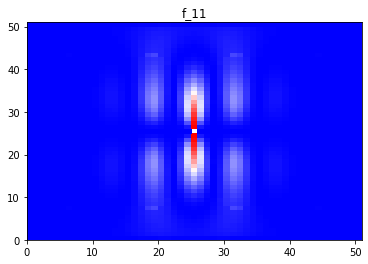

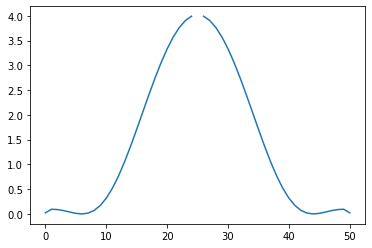

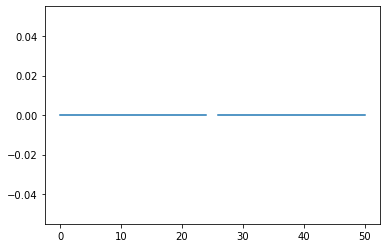

In [14]:
fig = plt.figure()
plt.pcolormesh(f_11, cmap='bwr')
plt.title('f_11')
f_11.shape
fig = plt.figure()
plt.plot(f_11[:, 25])
fig = plt.figure()
plt.plot(f_11[25, :])
f_11.max()


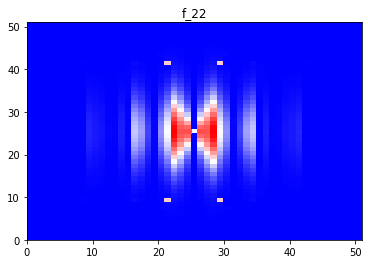

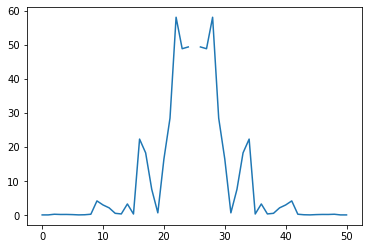

In [16]:
fig = plt.figure()
plt.pcolormesh(f_22, cmap='bwr')
plt.title('f_22')
f_11.shape

fig = plt.figure()
plt.plot(f_22[25,:])

## Compressed cat state

In [15]:
def SQ(r, theta): # squeezeing operator
    z = r * np.exp(1j * theta)
    return (0.5 * (np.conjugate(z) * a**2 - z * a.dag()**2)).expm()

In [32]:
sq_cat = SQ(0.5,0) * state_cat

In [33]:
w_sq_cat = wigner(sq_cat, vec, vec)

<ipython-input-34-6040426c6090>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(vec, vec, w_sq_cat, cmap = 'bwr')
<ipython-input-34-6040426c6090>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


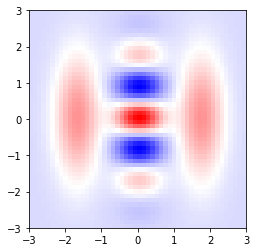

In [34]:
plt.pcolormesh(vec, vec, w_sq_cat, cmap = 'bwr')
plt.axes().set_aspect('equal')

In [56]:
f_11_sqcat = FI_calcluation(sq_cat, vec)[0]
f_12_sqcat = FI_calcluation(sq_cat, vec)[1]
f_21_sqcat = FI_calcluation(sq_cat, vec)[2]
f_22_sqcat = FI_calcluation(sq_cat, vec)[3]


In [49]:
shape(f_11_sqcat)

(51, 51)

<ipython-input-51-20fece0b05d6>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(vec, vec, f_11_sqcat, cmap = 'bwr')


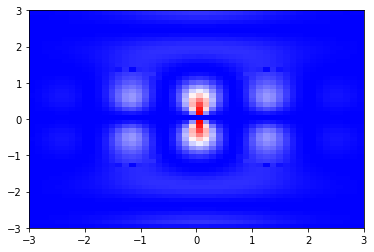

In [51]:
plt.pcolormesh(vec, vec, f_11_sqcat, cmap = 'bwr')

In [53]:
f_11_sqcat.shape

(51, 51)

In [57]:
f_11_sqcat.max()

10.207844104532795

In [58]:
f_12_sqcat.max()

6.754313767952894

In [59]:
f_21_sqcat.max()

6.754313767952894

In [60]:
f_22_sqcat.max()

22.793244543600583